## SCIPY IMRESIZE
https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.imresize.html#scipy.misc.imresize

<b> scipy.misc.imresize(arr, size, interp='bilinear', mode=None) </b> 
Resize an image.

Parameters:	
<b> arr : ndarray  </b>         The array of image to be resized.

<b>size : int, float or tuple</b>

                    int - Percentage of current size.
                    float - Fraction of current size.
                    tuple - Size of the output image.
                    
<b> interp : str, optional</b>

                    Interpolation to use for re-sizing (‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic’).
                    
<b>mode : str, optional </b>

                    The PIL image mode (‘P’, ‘L’, etc.) to convert arr before resizing.

Returns:	
<b>imresize : ndarray</b>
The resized array of image.

In [41]:
#Creating a numpy array from an image file:

from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # First we need to create the PNG file

face = misc.imread('face.png')
type(face)      

numpy.ndarray

In [42]:
face.shape, face.dtype
#dtype is uint8 for 8-bit images (0-255)

((768, 1024, 3), dtype('uint8'))

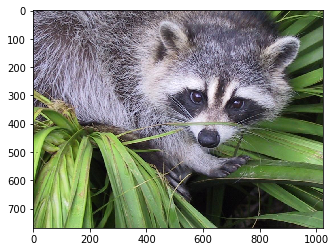

In [43]:
import matplotlib.pyplot as plt

plt.imshow(face)
plt.show()

## Size

In [44]:
# Resize to a predefined shape of the output
face_resized1 = misc.imresize(face, (32, 32), interp='bilinear', mode=None)
face_resized1.shape, face_resized1.dtype

((32, 32, 3), dtype('uint8'))

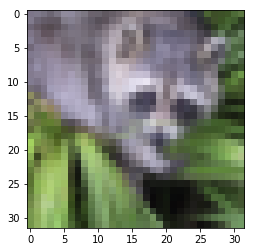

In [45]:
plt.imshow(face_resized1)
plt.show()

In [46]:
# Resize to a cetrain percent value
face_resized2 = misc.imresize(face, 50, interp='bilinear', mode=None)
face_resized2.shape, face_resized2.dtype

((384, 512, 3), dtype('uint8'))

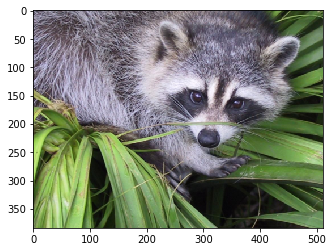

In [47]:
plt.imshow(face_resized2)
plt.show()

In [48]:
# Take a fraction of the image
face_resized3 = misc.imresize(face, 0.75, interp='bilinear', mode=None)
face_resized3.shape, face_resized3.dtype

((576, 768, 3), dtype('uint8'))

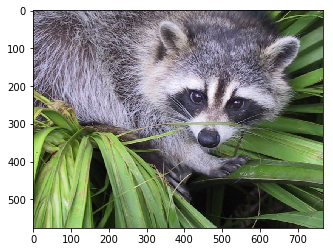

In [49]:
plt.imshow(face_resized3)
plt.show()

## Interpolation

<b> Bilinear interpolation</b>
Touching pixels average their values. This algorithm reduces contrast (sharp edges). This produces blurred, but jagged, edges.
<img width="10%" height="10%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Bilinear_interpolation_visualisation.svg/340px-Bilinear_interpolation_visualisation.svg.png">

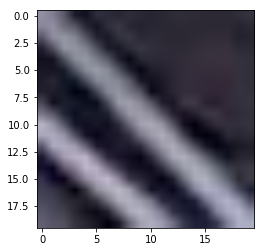

In [50]:
plt.imshow(face[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

<b> Nearest-neighbor interpolation</b>
<br>Replace every pixel with multiple pixels of the same color: The resulting image is larger than the original, and preserves all the original detail, but has undesirable jaggedness. 
<img width="20%" height="20%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Piecewise_constant.svg/440px-Piecewise_constant.svg.png">

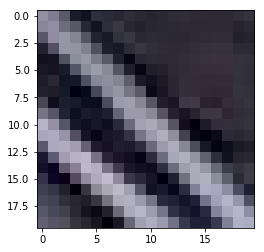

In [51]:
plt.imshow(face[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')
plt.show()

<b> Lanczos interpolation </b>
<br>
Lanczos resampling is typically used to increase the sampling rate of a digital signal, or to shift it by a fraction of the sampling interval. For image processing, the trade-off is between the reduction of aliasing artefacts and the preservation of sharp edges. Also as with any such processing, there are no results for the borders of the image. Increasing the length of the kernel increases the cropping of the edges of the image.
<img width="25%" height="25%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Lanczos-r01-filtering.svg/640px-Lanczos-r01-filtering.svg.png">

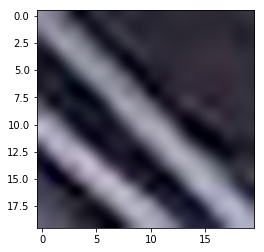

In [52]:
plt.imshow(face[320:340, 510:530], cmap=plt.cm.gray, interpolation='lanczos')
plt.show()

<b> Cubic </b>
<br> Interpolate with a spline where each piece is a third-degree polynomial specified in Hermite form.
Touching pixels average their values so central pixels maintain the most value.
<br>
<b>Bicubic </b>
<br> In image processing, bicubic interpolation is often chosen over bilinear interpolation or nearest neighbor in image resampling,
when speed is not an issue. In contrast to bilinear interpolation, which only takes 4 pixels (2×2) into account,
bicubic interpolation considers 16 pixels (4×4).
Images resampled with bicubic interpolation are smoother and have fewer interpolation artifacts.
<img width="25%" height="25%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Comparison_of_1D_and_2D_interpolation.svg/500px-Comparison_of_1D_and_2D_interpolation.svg.png">

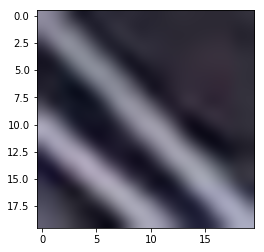

In [53]:
plt.imshow(face[320:340, 510:530], cmap=plt.cm.gray, interpolation='bicubic')
plt.show()

In [54]:
#‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic’
face_resized4 = misc.imresize(face, 45, interp='bicubic', mode=None)
face_resized4.shape, face_resized4.dtype

((345, 460, 3), dtype('uint8'))

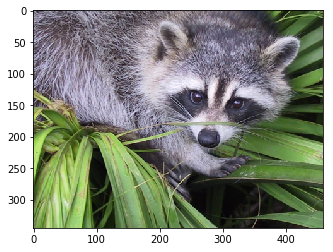

In [55]:
plt.imshow(face_resized4)
plt.show()

More:
Examples of custom image resizing functions taken from open source projects
http://programtalk.com/python-examples/scipy.misc.imresize/

## KERAS IMAGE PREPROCESSING
https://keras.io/preprocessing/image/
<br>
<b> keras.preprocessing.image.ImageDataGenerator() </b>
<br>
<b>width_shift_range:</b> Float (fraction of total width). Range for random horizontal shifts.
<br>
<b>height_shift_range:</b> Float (fraction of total height). Range for random vertical shifts.
<br>
<b>zoom_range:</b> Float or [lower, upper]. Range for random zoom. If a float,  [lower, upper] = [1-zoom_range, 1+zoom_range].
<br>
<b>channel_shift_range:</b> Float. Range for random channel shifts.


In [56]:
# Plot ad hoc CIFAR10 instances
import keras
import numpy
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

batch_size = 32
num_classes = 10
epochs = 20

#Load data, shuffled and split data between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#Normalize input
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

50000 train samples
10000 test samples
x_train shape: (50000, 32, 32, 3)


In [57]:
#Example of image preprocessing definition in Keras.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        zoom_range=0.5, # randomly zoom images
        channel_shift_range=0, # randomly shift channel
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#### Example of fitting a model (previously being defined) on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, validation_data=(x_test, y_test))